# Ross Datathon: Football Ticket Sales Analysis

## What is the question that your team set out to answer?

### Our team set out to answer "Which major groups should we target marketing efforts on?"

### We started by hypothesizing that alumni are more willing to buy football tickets than the general public.

### We had a hunch alumni might be more willing to buy football tickets than the general public:

### According to the [NY Times](https://www.nytimes.com/interactive/projects/college-mobility/university-of-michigan-ann-arbor), in 2017, Michigan graduates had a median income of $68,700.

### In contrast, according to [US Census ACS survey](https://www.deptofnumbers.com/income/michigan/), Michigan residents had a median income of $30,488.

## The main takeway from this comparison is that Michigan alumni have <u>a lot</u> more disposable income.

## In the next section, we investigate our hypothesis:

### Since we had sales data for the 2015-2019 football seasons, alumni data, and a unique ID for each buyer/alumni, we merge these two data sets by ID below:

In [1]:
import pandas as pd
import numpy as np

f19_sales = pd.read_csv('../data/F19Sales.csv')
f18_sales = pd.read_csv('../data/F18Sales.csv')
f17_sales = pd.read_csv('../data/F17Sales.csv')
f16_sales = pd.read_csv('../data/F16Sales.csv')
f15_sales = pd.read_csv('../data/F15Sales.csv')

sales = pd.concat([f15_sales, f16_sales, f17_sales, f18_sales, f19_sales])
sales.rename(columns = {'Customer ID':'ID Value'}, inplace = True)

alum = pd.read_csv('../data/AlumniReport.csv')

merge = pd.merge(left=sales, right=alum, on=['ID Value'])

merge.head()

,ID Value,Item,Qty,PL,PT,I Disp,Seatblock,Priority Points,Item Cost,Csz,...,Item Name,Degree,ID Type,Primary Degree Institution,Primary Degree Class Year,Primary Degree Education College,Primary Degree Education Status,Primary Address Country,Primary Address State,Primary Address Zip Code
0,122853,F02,2,1,PD,M (Mail),"1:23:40:26,25",999.13,200.0,"Frisco, TX 75034",...,Oregon State,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
1,122853,F03,2,1,PD,S (Special Handling Required),"1:23:40:4,3",999.13,230.0,"Frisco, TX 75034",...,Colorado,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
2,122853,F03,4,1,PD,M (Mail),"1:23:35:22,21 1:23:34:22,21",999.13,460.0,"Frisco, TX 75034",...,Colorado,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
3,122853,F05,2,1,PD,M (Mail),"1:22:21:2,1",999.13,310.0,"Frisco, TX 75034",...,Michigan State,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
4,122853,F12,2,1,PD,M (Mail),"1:22:21:2,1",999.13,310.0,"Frisco, TX 75034",...,Ohio State,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034


## We want to investigate what percent of non-student tickets that alumni buy.

### First, we calculated the total number of football tickets sold.

### We see that the total number of football tickets sold from 2015 to 2019 was <u>905,782</u> tickets.

In [2]:
total_tickets_sold = 0
for qty in sales['Qty']:
    qty = qty.replace(',', '')
    total_tickets_sold += int(qty)

# Total number of tickets sold
print(total_tickets_sold)

905782


### Next we calculate the total number of football tickets sold to alumni. 

### We see the that total number of football tickets sold to alumni from 2015 to 2019 was <u>100,955</u> tickets.

In [3]:
# Find a alum grad. year for every ticket sold
sales_graduation_years = []
for i, year in enumerate(merge['Primary Degree Class Year']):
    for _ in range(int(merge['Qty'][i])):
        sales_graduation_years.append(int(year))

# Number of alum tickets sold
print(len(sales_graduation_years))

100955


### Using the previous two cells, we calculate the proporation of tickets sold to alumni out of all tickets sold.

### We find that alumni buy about <u>11.15%</u> of all non-student tickets sold.

In [4]:
# Prop of tickets sold to alum
prop_tix_sold_to_alum = (len(sales_graduation_years) / total_tickets_sold)

0.1114561781974029


## Next, we want to investigate the percent of non-student ticket revenue that alumni generate.

### First, we calculate the total dollar amount spent on football tickets from 2015-2019. 

### We see the that total dollar amount spent on football tickets 2015 to 2019 was <u>$67,823,494.61</u>.

In [5]:
# Find total money spent on tickets
total_money_spent = np.sum(sales['Item Cost'])
print(total_money_spent)

67823494.61999999


### Next, we calculate the total dollar amount alumni spent on football tickets from 2015-2019. 

### We see the that total dollar amount alumni spent on football tickets 2015 to 2019 was <u>$8,518,062.99</u>.

In [6]:
# Find total money spent on tickets by alumni
total_money_spent_alum = np.sum(merge['Item Cost'])
print(total_money_spent_alum)

8518062.99


### Using the previous two cells, we calculate the proporation of revenue generated by alumni out of total non-student ticket revenue.

### We find that alumni generate about <u>12.56%</u> of all revenue generated by non-student tickets.

In [9]:
# Prop of revenue generated by alum
prop_rev_gen_by_alum = total_money_spent_alum / total_money_spent
print(prop_rev_gen_by_alum)

0.12559162629004625


## Using the percent non-student tickets that were bought by alumni and the percent of non-student revenue that was generated by alumni, we can calculate how much more alumni spend on tickets versus the general public.

### Recall that alumni buy about <u>11.15%</u> of all non-student tickets sold and generate about <u>12.56%</u> of all revenue generated by non-student tickets.

### $\frac{12.56\%}{11.15\%} = 1.13$

## Takeaway: On average, alumni spend about <u>1.13x</u> more on non-student football tickets than the general public.

## Overall, alumni are more willing to spend money on football tickets than the general public.

In [5]:
print((total_money_spent_alum / total_money_spent) / (len(sales_graduation_years) / total_tickets_sold))

1.126825164125112


Text(0.5, 0, 'Graduation Year')

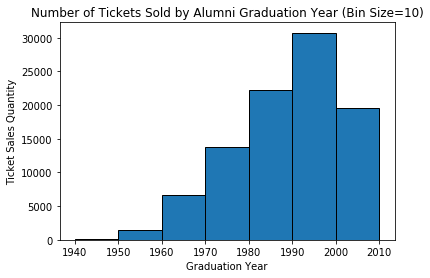

In [6]:
import matplotlib.pyplot as plt

# Clean data, remove any years below 1900
while np.min(sales_graduation_years) < 1900:
    sales_graduation_years.remove(np.min(sales_graduation_years))

BIN_SIZE = 10  

bins = np.arange(1940,2020,BIN_SIZE)

# Look at alum that bought tickets based on grad year
plt.hist(x=sales_graduation_years, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Graduation Year')
# plt.axis([1800, 2020, 0, 20000])

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

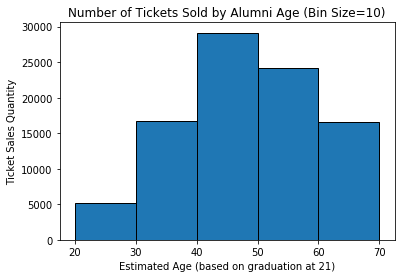

In [7]:
# Estimate ages

AGE_OF_GRAD = 21

bins = np.arange(20, 80, BIN_SIZE)
ages = []
for year in sales_graduation_years:
    ages.append(2020 - (year - AGE_OF_GRAD))

plt.hist(x=ages, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Age (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Estimated Age (based on graduation at 21)')


Text(0.5, 0, 'Graduation Year')

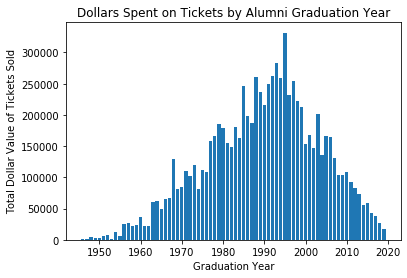

In [8]:
from collections import defaultdict

# Find total dollars spent by alumni by grad. year
rev_per_year = defaultdict(int)

for i, year in enumerate(merge['Primary Degree Class Year']):
    if year > 1900:
        rev_per_year[year] += merge['Item Cost'][i]
    
    
rpy = dict(sorted(rev_per_year.items()))
rpy
# 1958.0: 2421.62
#list(rev_per_year.keys())
# list(rev_per_year.values())

years = list(rpy.keys())
values = list(rpy.values())

plt.bar(years, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Graduation Year')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

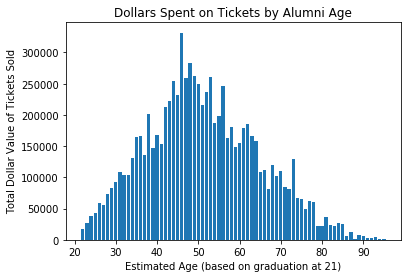

In [9]:
ages = []
for year in years:
    ages.append(2020 - (year - AGE_OF_GRAD))
    
plt.bar(ages, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Age')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')

Text(0.5, 0, 'Graduation Year')

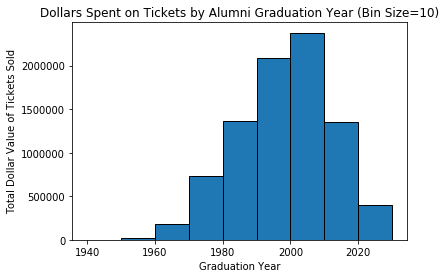

In [10]:
# Bin total dollars spent on tickets
BIN_SIZE = 10

rev_per_bin = defaultdict(int)

current_bin = 1940

# rev_per_bin[1940] represents all tickets sold from 1940 to (1940 + BIN_SIZE)
for year in range(1940, 2020):
    rev_per_bin[current_bin] += rev_per_year[year]
    if year > current_bin:
        current_bin += BIN_SIZE
        

years = list(rev_per_bin.keys())
values = list(rev_per_bin.values())

plt.bar(years, values, align='edge', width=BIN_SIZE, edgecolor='black')
plt.title(f'Dollars Spent on Tickets by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

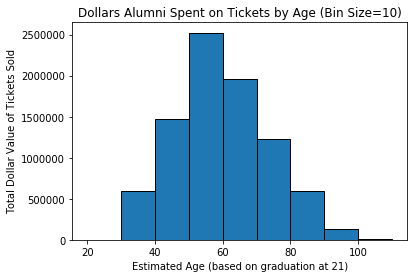

In [11]:
rev_per_bin_age = defaultdict(int)

current_bin = 20

# rev_per_bin[20] represents all tickets sold to alumni age 20 to (20 + BIN_SIZE)
for year in range(2020, 1940, -1):
    age = (2020 - (year - AGE_OF_GRAD))
    rev_per_bin_age[current_bin] += rev_per_year[year]
    if age > current_bin:
        current_bin += BIN_SIZE


ages = list(rev_per_bin_age.keys())
values = list(rev_per_bin_age.values())

plt.bar(ages, values, align='edge', width=BIN_SIZE, edgecolor='black')
plt.title(f'Dollars Alumni Spent on Tickets by Age (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')